# Author: Jaden Armstrong
# Date: 11/03/2023
# Name: Problem2_r.ipynp

Install the readr package and read in the nutrition_subset data via URL

In [60]:
library(readr)
data <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)

Summarize data to view the distribution of the data and determine if cleansing needs to be done. We know from our python analysis of this data that no null values exist originally.

In [61]:
summary(data)

  food item         weight_in_grams  saturated_fat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  

Outliers do exist in this data set as seen by the glarily large maxes compared to the low means and quartiles. Manual calculation was done to confirm each of these fields have outliers

---

Rename data to food_data for clarity reasons

In [62]:
food_data <- data


Begin to remove outliers

In [63]:
# Calculate the mean and standard deviation for each numeric variable
mean_weight <- mean(food_data$weight_in_grams)
sd_weight <- sd(food_data$weight_in_grams)

mean_fat <- mean(food_data$saturated_fat)
sd_fat <- sd(food_data$saturated_fat)

mean_cholesterol <- mean(food_data$cholesterol)
sd_cholesterol <- sd(food_data$cholesterol)

# Replace values that are 3 standard deviations above or below the mean with NA
food_data$weight_in_grams[food_data$weight_in_grams < (mean_weight - 3 * sd_weight) | food_data$weight_in_grams > (mean_weight + 3 * sd_weight)] <- NA
food_data$saturated_fat[food_data$saturated_fat < (mean_fat - 3 * sd_fat) | food_data$saturated_fat > (mean_fat + 3 * sd_fat)] <- NA
food_data$cholesterol[food_data$cholesterol < (mean_cholesterol - 3 * sd_cholesterol) | food_data$cholesterol > (mean_cholesterol + 3 * sd_cholesterol)] <- NA

# Impute missing values with the mean
food_data$weight_in_grams[is.na(food_data$weight_in_grams)] <- mean_weight
food_data$saturated_fat[is.na(food_data$saturated_fat)] <- mean_fat
food_data$cholesterol[is.na(food_data$cholesterol)] <- mean_cholesterol

summary(food_data)

  food item         weight_in_grams saturated_fat     cholesterol    
 Length:961         Min.   :  0.4   Min.   : 0.000   Min.   :  0.00  
 Class :character   1st Qu.: 32.0   1st Qu.: 0.000   1st Qu.:  0.00  
 Mode  :character   Median :113.0   Median : 0.400   Median :  0.00  
                    Mean   :128.5   Mean   : 2.756   Mean   : 19.41  
                    3rd Qu.:210.0   3rd Qu.: 3.300   3rd Qu.: 20.00  
                    Max.   :635.0   Max.   :36.200   Max.   :326.00  

By looking at the new spread of the data, we can see that it is still heavily left skewed. I am going to repeat the last code in an attempt to remove outliers that exist in the updated data set.

In [64]:
# Calculate the mean and standard deviation for each numeric variable
mean_weight <- mean(food_data$weight_in_grams)
sd_weight <- sd(food_data$weight_in_grams)

mean_fat <- mean(food_data$saturated_fat)
sd_fat <- sd(food_data$saturated_fat)

mean_cholesterol <- mean(food_data$cholesterol)
sd_cholesterol <- sd(food_data$cholesterol)

# Replace values that are 3 standard deviations above or below the mean with NA
food_data$weight_in_grams[food_data$weight_in_grams < (mean_weight - 3 * sd_weight) | food_data$weight_in_grams > (mean_weight + 3 * sd_weight)] <- NA
food_data$saturated_fat[food_data$saturated_fat < (mean_fat - 3 * sd_fat) | food_data$saturated_fat > (mean_fat + 3 * sd_fat)] <- NA
food_data$cholesterol[food_data$cholesterol < (mean_cholesterol - 3 * sd_cholesterol) | food_data$cholesterol > (mean_cholesterol + 3 * sd_cholesterol)] <- NA

# Impute missing values with the mean
food_data$weight_in_grams[is.na(food_data$weight_in_grams)] <- mean_weight
food_data$saturated_fat[is.na(food_data$saturated_fat)] <- mean_fat
food_data$cholesterol[is.na(food_data$cholesterol)] <- mean_cholesterol

summary(food_data)

  food item         weight_in_grams saturated_fat     cholesterol    
 Length:961         Min.   :  0.4   Min.   : 0.000   Min.   :  0.00  
 Class :character   1st Qu.: 32.0   1st Qu.: 0.000   1st Qu.:  0.00  
 Mode  :character   Median :113.0   Median : 0.400   Median :  0.00  
                    Mean   :122.2   Mean   : 1.985   Mean   : 13.91  
                    3rd Qu.:195.0   3rd Qu.: 2.756   3rd Qu.: 19.41  
                    Max.   :430.0   Max.   :17.900   Max.   :146.00  

In [65]:
install.packages("Hmisc")
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





---

List of saturated_ fat entries sorted by the five food items that are highest in saturated fat

In [66]:
head(food_data[order(food_data$saturated_fat, decreasing=TRUE), 1:3], 5)

food item,weight_in_grams,saturated_fat
<chr>,<dbl>,<dbl>
MARGARINE; REGULR;HARD;80% FAT1/2 CUP,113,17.9
MARGARINE; IMITATION 40% FAT 8 OZ,227,17.5
HALF AND HALF; CREAM 1 CUP,242,17.3
SWEETENED CONDENSED MILK CNND 1 CUP,306,16.8
IMITATION WHIPPED TOPPING;FRZN1 CUP,75,16.3


Comment: This is not an effective representation of items with the highest saturated fat, since different food items are not scaled the same (Must compare the saturated_fat in terms of per grams)

In [67]:
# Create the new variable saturated_fat_per_gram
food_data$saturated_fat_per_gram <- food_data$saturated_fat / food_data$weight_in_grams

# Sort the data by saturated_fat_per_gram in descending order and list the top 5 items
top_5_saturated_fat_per_gram <- head(food_data[order(food_data$saturated_fat_per_gram, decreasing = TRUE), ], 5)

# Print the top 5 items
top_5_saturated_fat_per_gram

food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BUTTER; SALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; UNSALTED 1 TBSP,14,7.1,31,0.5071429
BUTTER; SALTED 1 PAT,5,2.5,11,0.5000000
BUTTER; UNSALTED 1 PAT,5,2.5,11,0.5000000
LARD 1 TBSP,13,5.1,12,0.3923077


Standardize Saturated_fat_per_gram

In [68]:
# Standardize the variable saturated_fat_per_gram
food_data$standardized_saturated_fat_per_gram <- scale(food_data$saturated_fat_per_gram)

# Identify outliers at the high end
outliers_high <- head(food_data[food_data$standardized_saturated_fat_per_gram > 2, ], 5)

# Count the number of outliers at the low end
outliers_low <- sum(food_data$standardized_saturated_fat_per_gram < -2)

# Print the food items that are outliers at the high end
#outliers_high
summary(food_data$standardized_saturated_fat_per_gram)
# Print the number of outliers at the low end
#outliers_low

       V1         
 Min.   :-0.5579  
 1st Qu.:-0.5579  
 Median :-0.4098  
 Mean   : 0.0000  
 3rd Qu.: 0.1223  
 Max.   : 8.3271  

Create a density plot for saturated_fat_per_gram by installing ggplot2

In [69]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



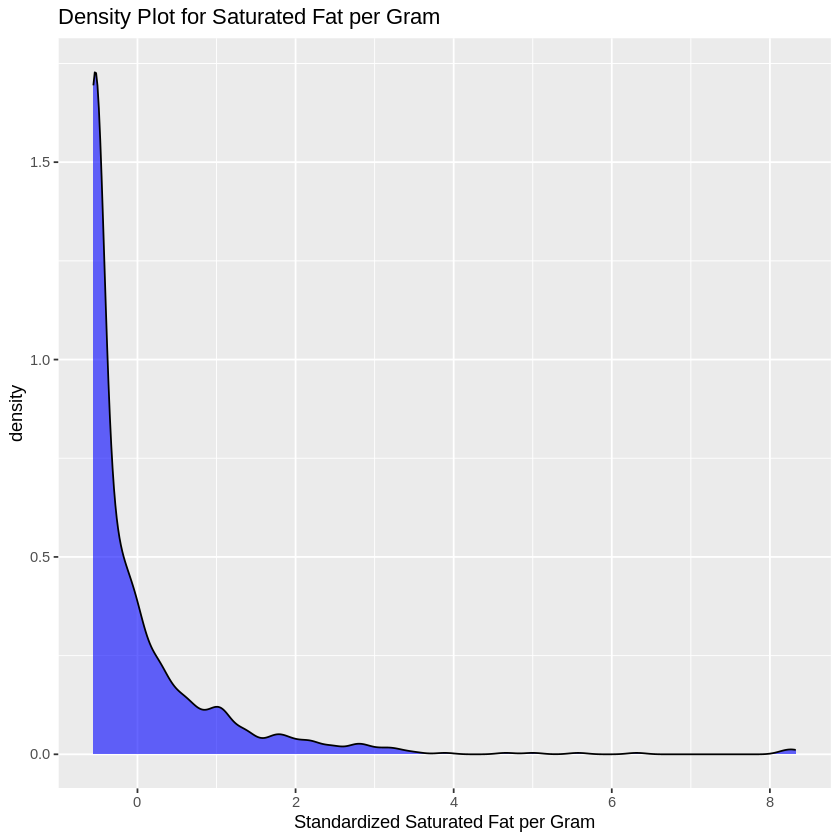

In [70]:
library(ggplot2)

# Create a density plot for saturated_fat_per_gram
ggplot(food_data, aes(x = standardized_saturated_fat_per_gram)) +
  geom_density(fill = "blue", alpha = 0.6) +
  labs(title = "Density Plot for Saturated Fat per Gram", x = "Standardized Saturated Fat per Gram")

Check for missing values in the enitre data set

In [71]:
# Print missing values in the entire data frame
missing_values <- sum(is.na(food_data))
print(paste("Total missing values:", missing_values))

[1] "Total missing values: 0"


There are no missing values, so nothing needs to be done



Standardize (zero mean) the numeric values


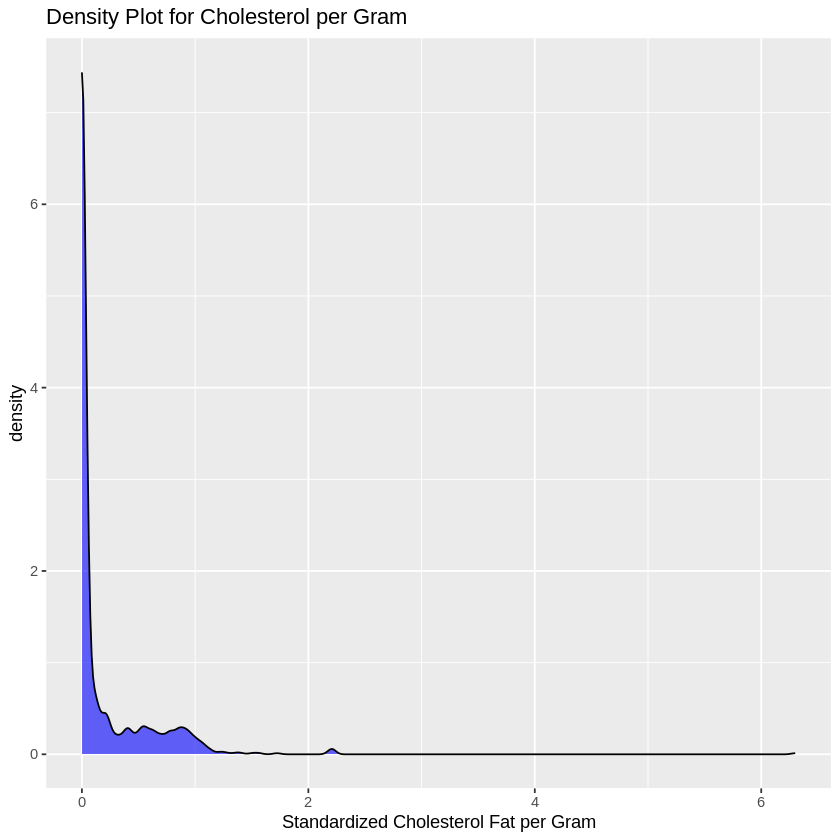

In [72]:
# Impute standardized_saturated_fat_per_gram values back to saturated_fat_per_gram
food_data$saturated_fat_per_gram <- food_data$standardized_saturated_fat_per_gram

# Delete the standardized_saturated_fat_per_gram column
food_data$standardized_saturated_fat_per_gram <- NULL

# Standarize cholesterol
# Create the new variable Cholesterol_per_gram
food_data$cholesterol_per_gram <- food_data$cholesterol / food_data$weight_in_grams
# Standardize cholesterol_per_gram
food_data$Cholesterol_per_gram <- scale(food_data$cholesterol_per_gram)

ggplot(food_data, aes(x = cholesterol_per_gram)) +
  geom_density(fill = "blue", alpha = 0.6) +
  labs(title = "Density Plot for Cholesterol per Gram", x = "Standardized Cholesterol Fat per Gram")


Determine if there are any outliers

In [73]:
# Calculate and identify outliers
Q1 <- quantile(food_data$Cholesterol_per_gram, 0.25)
Q3 <- quantile(food_data$Cholesterol_per_gram, 0.75)
IQR <- Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Identify outliers
outliers <- food_data$Cholesterol_per_gram < lower_bound | food_data$Cholesterol_per_gram > upper_bound

# Print the number of outliers
cat("Number of outliers:", sum(outliers), "\n")

# You can also print the outlier values if needed
cat("Outlier values:", food_data$Cholesterol_per_gram[outliers], "\n")

Number of outliers: 158 
Outlier values: 1.490177 1.525523 1.550797 2.635439 0.9561325 1.277003 1.143617 2.395752 1.959056 2.021159 2.617888 1.772582 1.65721 1.674224 2.219314 1.775448 1.898303 1.937328 1.461597 1.283198 1.281216 1.442483 2.244867 1.669729 1.164265 0.8661463 1.846765 1.52232 1.559083 1.915854 1.969112 1.993078 1.779294 1.883944 1.623006 1.818395 1.372397 2.294127 2.085994 2.769858 1.798371 1.745888 1.907595 2.115728 1.848129 15.45107 1.550797 1.677163 0.9040994 2.190455 1.729196 3.334789 1.639996 1.877862 1.58053 1.312931 2.203354 1.668471 1.935912 1.311882 1.012367 2.141452 2.056261 1.788662 1.372397 2.204927 1.667442 1.669729 1.705244 1.095167 1.875738 1.818395 0.8669329 1.045332 1.104799 1.133588 1.935912 1.401029 1.490177 1.324668 1.758929 2.056261 1.283198 0.9477864 1.49133 1.550797 1.164265 2.414918 0.9552935 0.9477864 2.056261 1.494634 0.8837919 1.278623 1.134532 1.757618 1.108515 3.475109 1.169481 2.056261 0.8074665 0.9034474 1.093472 0.8028736 1.494634 0.82068

Outliers do exist, but that is very expected since many of the food items are very different in size, one ite may be 40 times larger in grams than a similar item so it is expected their values are much higher.


---


In conclusion, it is normal for there to be so many 0's in the data set for cholesterol and some for saturated_fat. Although this is because some items are much heavier in scale than the other majority of items so it is important to remove the large ones since it will skew our analysis. If you were to keep imputing the outliers with the mean of cholesterol, 0, then after a while the spread of data will go closer to 0 since the mean is still 0 which would effective remove outliers that are less than 3 standard deviations from the mean originally. Other than that, the analyses of standardized numeric values was helpful and the ploting of those values were successful.